# **Predicting Churning Customers**        

**By: Akshay Kumar Pydi** 

https://www.linkedin.com/in/akshaykumarpydi/

#Executive Summary 
---

Customer Churn, also known as customer attrition, is the loss of clients or customers. The ability to predict that a particular customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for the business. The Bank churners dataset is used to build a model that can predict the likelihood of a customer getting churned. 

The bank churners dataset contains more than 10,000 entries about customers, their income, credit limit, age, gender, dependent count, and Total transaction amount, etc. In total, there are 23 columns, of which 6 are categorical variables and the rest are continuous. The target variable has a binary value that indicates whether the customer is an Existing customer or Attrited customer. This analysis focuses on the behavior of bank customers who are more likely to leave the bank (i.e., close their credit card account).

The analysis and exploration has been done strictly in Python, utilizing multiple different models. For analysis, it started with data exploration. After that, modified the dataset based on findings and created machine learning models applicable for categorical target variable. The models that were explored are Logistic Regression, Decision tree, KNN, AdaBoostClassifier, Random Forest Classifier, Gradient Boosting Classifier, and Extra Trees Classifier and Perceptron. After evaluating all the models, it is found that the Decision tree model is performing best. It has a total accuracy of 93.45% and Recall value of 0.83. It was identified as to why customers churn and which customers are most likely to leave the service in the future using machine learning techniques.

Business value : This analysis will provide insights on how bank managers can better retain customers and continue to grow the business. Investigation was done on various models and analyze which areas and variables play a strong role in the customer leaving services so that the bank can identify them and act quickly to save them. The business value that would be generated from this prediction would be increased profit, improved customer relationships, and sustained company growth. 

# Problem Statement
---
A manager at the bank is disturbed with more and more customers leaving their credit card services. When a customer churns or leaves, the bank loses business, thus impacting the recurring revenue. Significant sums are spent by banks to acquire a customer, which is far more than retaining an existing one. Besides the direct loss of revenue that results from a customer abandoning the services, the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. 

Every company globally developing customer service programs needs to have a line of sight to predict customer churn to reduce costs of non-conformance and ensure customer loyalty & remain competitive. 


# Data Dictionary
---



1.   **CLIENTNUM** : Unique identifier for the customer holding the account
2.   **Attrition_Flag** : Status of Customer- Existing/Attrited (Target Variable)
3.   **Customer_Age** : Age of Customer
4.   **Gender** : Gender of Customer (M/F)
5.   **Dependent_count** : Number of people dependent on card holder
6.   **Education_level** : Educational Qualification of the account holder (College, Doctorate, Graduate, High School, PostGraduate, Uneducated, Unknown)
7.   **Marital_Status** : Customer Marital Status (Married, Single, Divorced, Unknown)
8.   **Income_category** : Annual income category of the account_holder (<$40K, $40K-$60K, $60K-$80K, $80K-$120K)
9.   **Card_category** : Type of card (Blue, Silver, Gold, Platinum)
10.  **Months_on_book** : Period of relationship with the bank
11.  **Total_Relationship_Count** : Total number of cards held by the customer
12.  **Months_Inactive_12_mon** : Number of months inactive in the last 12 months
13.  **Contacts_count_12_mon** : Number of contacts in the last 12 months
14.  **Credit_Limit** : Credit limit on the credit card
15.  **Total_Revolving_Bal** : Total Revolving balance on the credit card
16.  **Avg_Open_To_Buy** : Open to buy credit lines (average in last 12 months)
17.  **Total_Amt_Chng_Q4_Q1** : Change in transaction amount( Quarter4 over Quarter 1)
18.  **Total_Trans_Amt** : Total transaction amount (last 12 months)
19.  **Total_Trans_Ct** : Total Transaction Count (last 12 months)
20.  **Total_Ct_Chng_Q4_Q1** : Change in Transaction Count (Q4 over Q1)
21.  **Avg_Utilization_Ratio** : Average Card Utilization Ratio







#Methodology
---
To build the model, SEMMA process was followed.  This stands for Sample, Explore, Modify, Model, and Assess.

## Sample
---

This is the first process of SEMMA, where dataset is taken from Kaggle. The raw dataset has 10,127 rows and 23 columns. 

Link to the dataset : https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [ ]:
#importing modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import tree

In [ ]:
#Reading datafile into Pandas dataframe
# Mounting the Files in Google Drive, sharing it in Public link and Reading the data
# Step 1: copy & paste the shared link you will get from Google Drive

URL = 'https://drive.google.com/file/d/1zSRzDQV_AkCH2XQPUOou2ZyFLJM02soq/view?usp=sharing'

# Step 2: copy & paste the command below (this part of the command is fixed)
fixed_path = 'https://drive.google.com/uc?export=download&id='
# Step 3: Extract the file ID from the URL (this part of the command is fixed)
file_path = URL.split('/')[-2]
# Retrieve the CSV data and build a dataframe
df = pd.read_csv(fixed_path + file_path)

## Explore
---

In this step, data analysis was done by looking at each column/variable in order to understand its effects on the prediction. For this, I created bar-chart, heat-map visualizations and reviewed the distributions of some of the variables to help see the details at a granular level. Data was also explored statistically in order to identify things like missing values within the dataset along with examining the importance of all the variables in predicting the target variable.There are no Missing values.

### Summary of Dataframe

In [ ]:
#Checking the shape - number of rows and columns in dataset
df.shape

(10127, 23)

In [ ]:
#Summary of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
#Dropping the variable "Clientnum"
#Dropping the variables derived by dataset owner for their analysis (last two columns)
df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)


In [ ]:
#Checking the dataset summary after dropping the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
#Checking the basic statistics for each variable
df.describe()

Customer_Age  ...  Avg_Utilization_Ratio
count  10127.000000  ...           10127.000000
mean      46.325960  ...               0.274894
std        8.016814  ...               0.275691
min       26.000000  ...               0.000000
25%       41.000000  ...               0.023000
50%       46.000000  ...               0.176000
75%       52.000000  ...               0.503000
max       73.000000  ...               0.999000

[8 rows x 14 columns]

### Distribution of target variable 

([<matplotlib.patches.Wedge at 0x7f901c060d50>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customers'),
  Text(1.0503678211160241, -0.5802822075197344, 'Attrited Customers')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.93%'),
  Text(0.6127145623176807, -0.33849795438651165, '16.07%')])

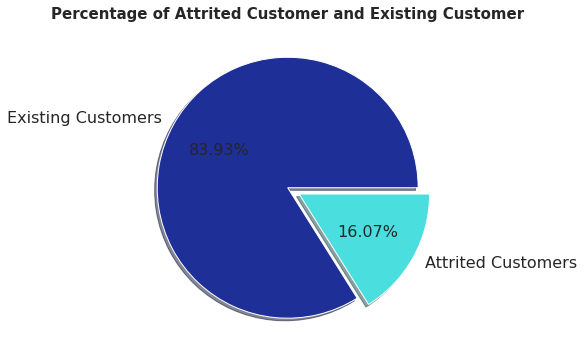

In [ ]:
# Percentage distribution of Target variable Attrition Flag - pie chart
import matplotlib.pyplot as plt
count=pd.value_counts(df['Attrition_Flag']).tolist()
plt.figure(figsize=(6,6))
plt.title("Percentage of Attrited Customer and Existing Customer", fontsize = 15, fontweight='bold')
plt.pie(x=count,labels=["Existing Customers","Attrited Customers"],autopct='%.2f%%', colors =['#1e2f97', '#4ADEDE'], explode=(0,0.1), shadow=True)

### Converting target variable to Binary (0,1)

In [ ]:
#Show attrition_flag as an integer, either 1 or 0
# 0 = Exisiting Customer
# 1 = Attrited Customer


df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})
df

Attrition_Flag  Customer_Age  ... Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
0                   0            45  ...               1.625                  0.061
1                   0            49  ...               3.714                  0.105
2                   0            51  ...               2.333                  0.000
3                   0            40  ...               2.333                  0.760
4                   0            40  ...               2.500                  0.000
...               ...           ...  ...                 ...                    ...
10122               0            50  ...               0.857                  0.462
10123               1            41  ...               0.683                  0.511
10124               1            44  ...               0.818                  0.000
10125               1            30  ...               0.722                  0.000
10126               1            43  ...               0.649                  0.189

[10127 rows x 20 columns]

In [ ]:
#Summary of new Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### Correlation heatmap

Plotting the correlation heatmap to see the correlation between different variables and the impact of all the variables on target variable. 

In [ ]:
#Correlation between variables
corr = df.corr()
corr

Attrition_Flag  ...  Avg_Utilization_Ratio
Attrition_Flag                  1.000000  ...              -0.178410
Customer_Age                    0.018203  ...               0.007114
Dependent_count                 0.018991  ...              -0.037135
Months_on_book                  0.013687  ...              -0.007541
Total_Relationship_Count       -0.150005  ...               0.067663
Months_Inactive_12_mon          0.152449  ...              -0.007503
Contacts_Count_12_mon           0.204491  ...              -0.055471
Credit_Limit                   -0.023873  ...              -0.482965
Total_Revolving_Bal            -0.263053  ...               0.624022
Avg_Open_To_Buy                -0.000285  ...              -0.538808
Total_Amt_Chng_Q4_Q1           -0.131063  ...               0.035235
Total_Trans_Amt                -0.168598  ...              -0.083034
Total_Trans_Ct                 -0.371403  ...               0.002838
Total_Ct_Chng_Q4_Q1            -0.290054  ...               0.074143
Avg_Utilization_Ratio          -0.178410  ...               1.000000

[15 rows x 15 columns]

In [ ]:
# Importing modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Correlation Heatmap')

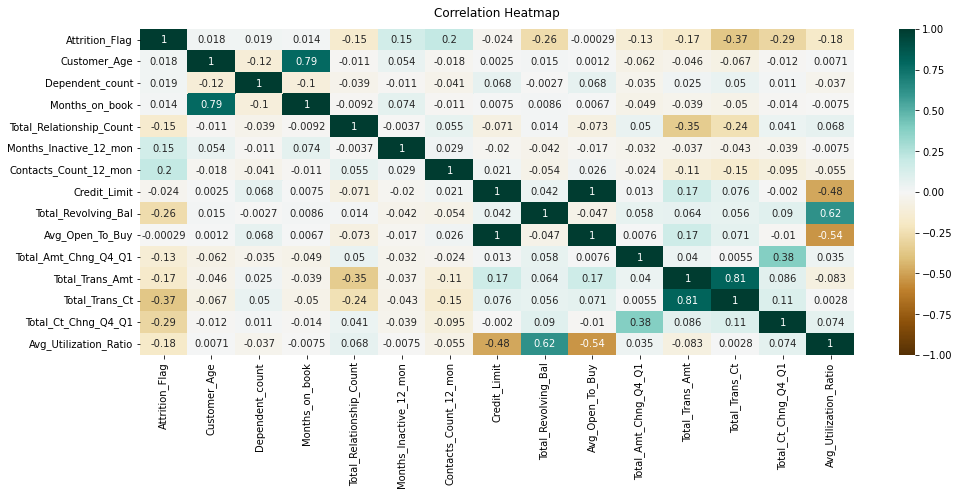

In [ ]:
#Plotting heatmap of Correlation matrix for all the numberical variables
plt.figure(figsize=(16, 6))   # to increase the size of heatmap
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Each box shows a correlation between the variables on each axis. The closer the value is to 0, the less linear trend between variables. Looking only at target variable (Attrition Flag), the most correlated variables are Total_Revolving_Bal on the negative side, and Contacts_Count_12_mon on the positive side. However, these are still not that significant to understand in determining that these truly impact target variable. So, lets continue with further explorations.

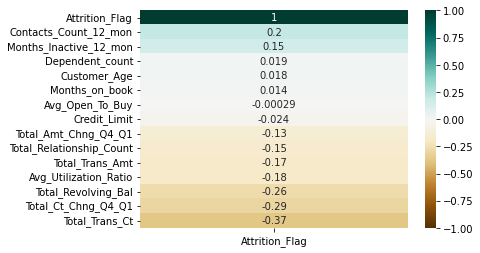

In [ ]:
#heatmap of target variable for checking correlation with other variables
heatmap_2 = sns.heatmap(df.corr()[['Attrition_Flag']].sort_values(by='Attrition_Flag', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

This gives a better view by ranking the correlation from highest to lowest.

### Bar chart visualizations for Categorical variables



#### Gender Distribution

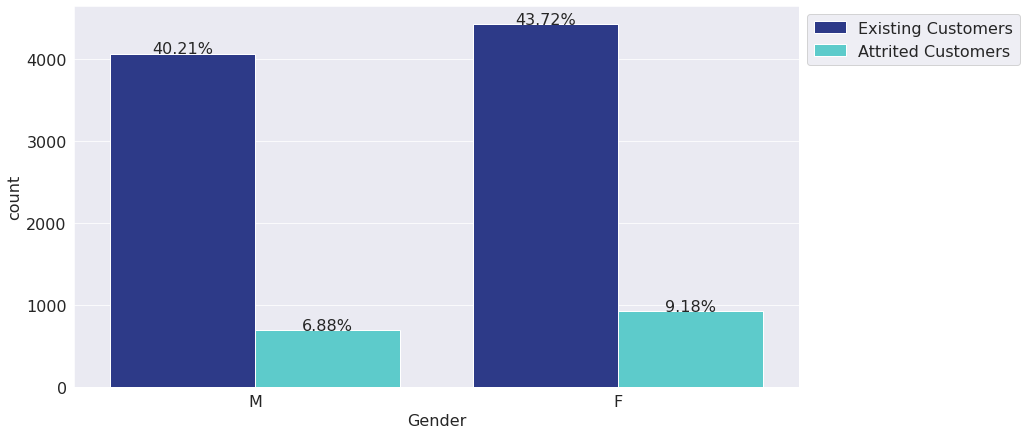

In [ ]:
fig, axis = plt.subplots(figsize=(13,7)) # Assigning the Plot size
ax=sns.countplot(x='Gender',data=df, hue='Attrition_Flag', palette = ['#1e2f97', '#4ADEDE']) # Taking the X and Y axis of the plot
ax.legend(bbox_to_anchor=(1, 1),labels=["Existing Customers","Attrited Customers"]) # Defining the Legends.

for p in ax.patches: # A loop to show the values in Percentage for the Bar Plots.
  ax.text(p.get_x()+p.get_width()/2# to center the % value on the bar chart at the top by X axis
          ,p.get_height() # to show the Y position of the percentage value
          ,'{:1.2f}%'.format(p.get_height()/len(df)*100) # To calculate the Percentage value for easy representation
          ,ha="center" # To centralize the Whole texting of the % value.
          )

From the plot above, it can be observed that the bank have more female customers as compared to the males. However, there is no clear differentition as which gender is more likely to churn (Leave the services)

#### Education Level

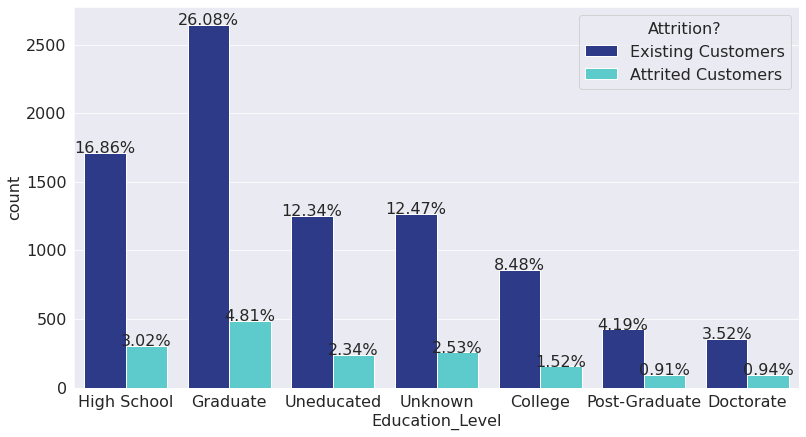

In [ ]:
fig, axis = plt.subplots(figsize=(13,7)) # Assigning the Plot size
ax=sns.countplot(x='Education_Level',data=df, hue='Attrition_Flag', palette = ['#1e2f97', '#4ADEDE']) # Taking the X and Y axis of the plot
ax.legend(bbox_to_anchor=(1, 1),title="Attrition?",labels=["Existing Customers","Attrited Customers"]) # Defining the Legends.

for p in ax.patches: # A loop to show the values in Percentage for the Bar Plots.
  ax.text(p.get_x()+p.get_width()/2# to center the % value on the bar chart at the top by X axis
          ,p.get_height() # to show the Y position of the percentage value
          ,'{:1.2f}%'.format(p.get_height()/len(df)*100) # To calculate the Percentage value for easy representation
          ,ha="center" # To centralize the Whole texting of the % value.
          )

From the plot above, it can be observed that the highest number of users for the credit card services are Graduate students, and there is roughly a ratio of 1:5 for a Attrited customer/ Existing customer at all Education level.

#### Marital Status

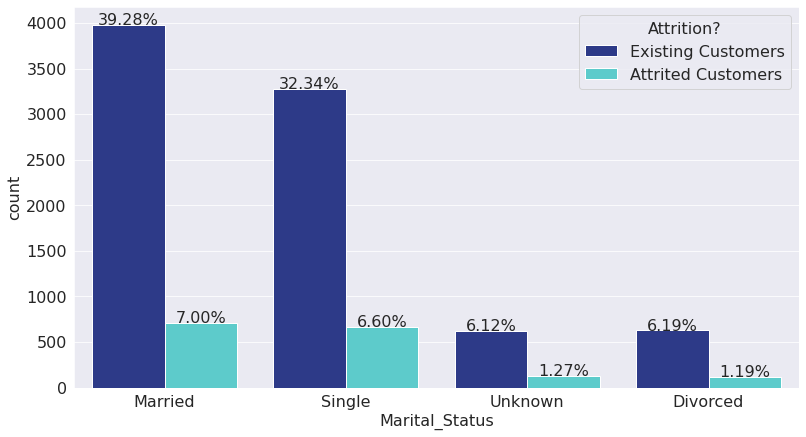

In [ ]:
fig, axis = plt.subplots(figsize=(13,7)) # Assigning the Plot size
ax=sns.countplot(x='Marital_Status',data=df, hue='Attrition_Flag', palette = ['#1e2f97', '#4ADEDE']) # Taking the X and Y axis of the plot
ax.legend(bbox_to_anchor=(1, 1),title="Attrition?",labels=["Existing Customers","Attrited Customers"]) # Defining the Legends.

for p in ax.patches: # A loop to show the values in Percentage for the Bar Plots.
  ax.text(p.get_x()+p.get_width()/2# to center the % value on the bar chart at the top by X axis
          ,p.get_height() # to show the Y position of the percentage value
          ,'{:1.2f}%'.format(p.get_height()/len(df)*100) # To calculate the Percentage value for easy representation
          ,ha="center" # To centralize the Whole texting of the % value.
          )

From the plot above, it can be seen that the highest number of users for the credit card services are Married, and there is roughly a ratio of 1:5 for a Attrited customer/ Existing customer for all Marital status.

#### Income Category

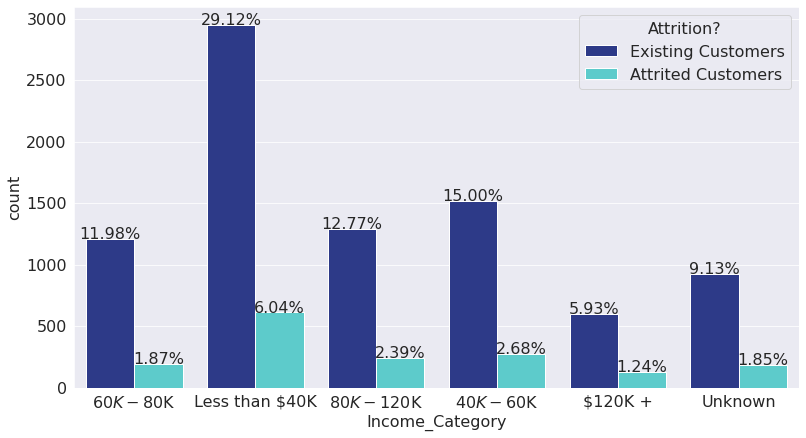

In [ ]:
fig, axis = plt.subplots(figsize=(13,7)) # Assigning the Plot size
ax=sns.countplot(x='Income_Category',data=df, hue='Attrition_Flag', palette = ['#1e2f97', '#4ADEDE']) # Taking the X and Y axis of the plot
ax.legend(bbox_to_anchor=(1, 1),title="Attrition?",labels=["Existing Customers","Attrited Customers"]) # Defining the Legends.

for p in ax.patches: # A loop to show the values in Percentage for the Bar Plots.
  ax.text(p.get_x()+p.get_width()/2# to center the % value on the bar chart at the top by X axis
          ,p.get_height() # to show the Y position of the percentage value
          ,'{:1.2f}%'.format(p.get_height()/len(df)*100) # To calculate the Percentage value for easy representation
          ,ha="center" # To centralize the Whole texting of the % value.
          )

From the plot above, it can be concluded that most of the existing customers and attrited customers come from group of people making less than $40k a year. Besided that, the ratio of existing customer vs. attrited for each of the income category is very similar across the board. 

####  Card Category

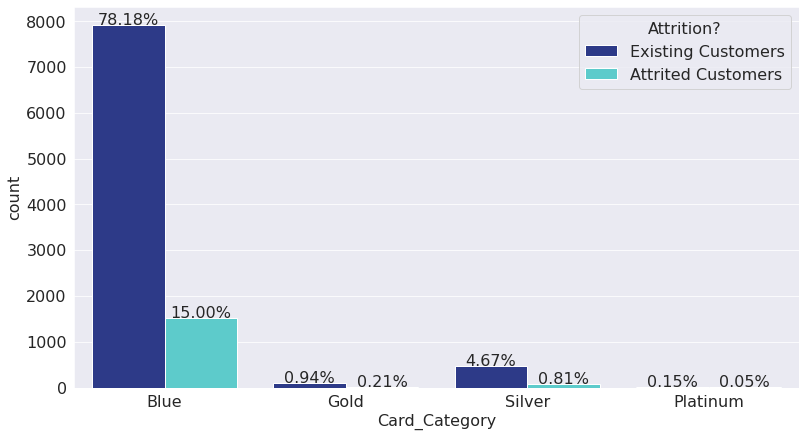

In [ ]:
fig, axis = plt.subplots(figsize=(13,7)) # Assigning the Plot size
ax=sns.countplot(x='Card_Category',data=df, hue='Attrition_Flag', palette = ['#1e2f97', '#4ADEDE']) # Taking the X and Y axis of the plot
ax.legend(title="Attrition?",labels=["Existing Customers","Attrited Customers"]) # Defining the Legends.

for p in ax.patches: # A loop to show the values in Percentage for the Bar Plots.
  ax.text(p.get_x()+p.get_width()/2# to center the % value on the bar chart at the top by X axis
          ,p.get_height() # to show the Y position of the percentage value
          ,'{:1.2f}%'.format(p.get_height()/len(df)*100) # To calculate the Percentage value for easy representation
          ,ha="center" # To centralize the Whole texting of the % value.
          )

From the plot above it can be understood that in genral most of the customers belong to the blue card category. It would be around 93% for all the customers that belong to that group. Focusing on only that segment, about 15% decide to leave the services. 

In [ ]:
!pip install seaborn
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15,10) # to change the default plot size

### Box plot Analysis for all Continuous Variables

#### Months on Book

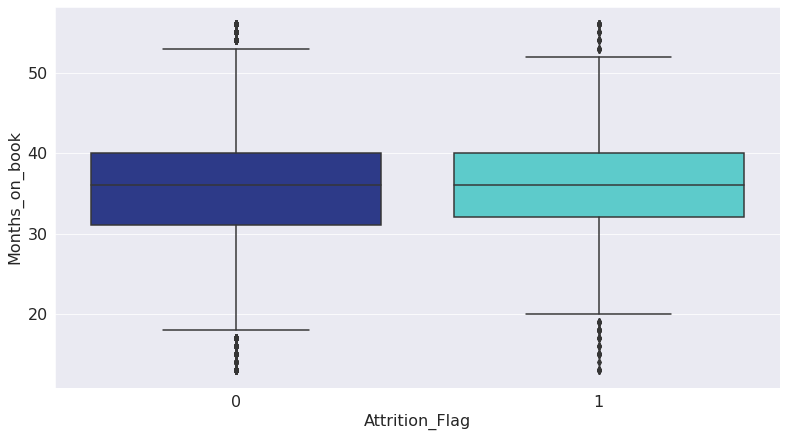

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df, palette = ['#1e2f97', '#4ADEDE'])

From this BOX plot one cannot differentiate the values of Months on Book for Attrition flag. The values of Month_On_book between 32 to 40 can be categorized as both Existing and Attrited Customers (Attrition flag of 0 and 1). This column can be removed as it does not contribute much to the Attrition.

#### Customer Age 

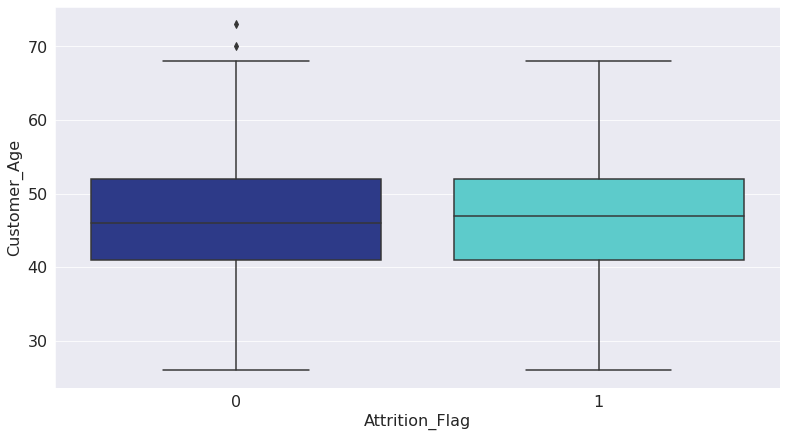

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df, palette = ['#1e2f97', '#4ADEDE'])

It can be understood that customer age of 40 to 53 can be categorized as attrition flag 0 and 1. This would be hard to categorize the Attrition and hence is an insignificant column which can be deleted.

#### Avg_Open_To_Buy 

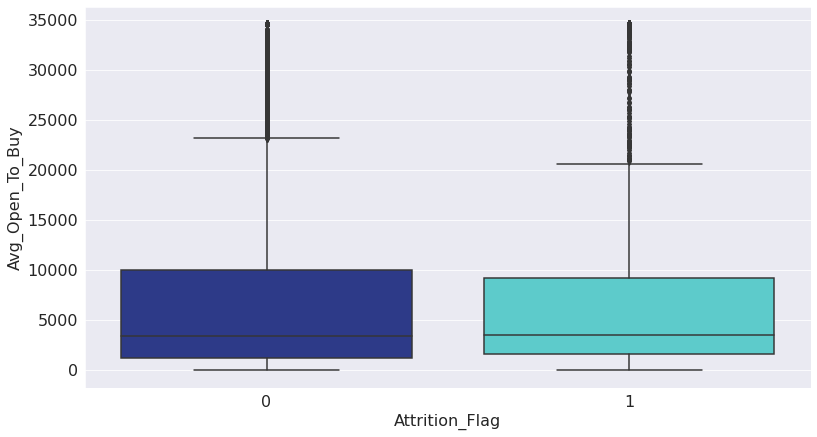

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=df, palette = ['#1e2f97', '#4ADEDE'])

Open to Buy Credit Line (Average of last 12 months) is very similar for both attrited and existing customers. No significant findings here.

#### Total Relationship Count

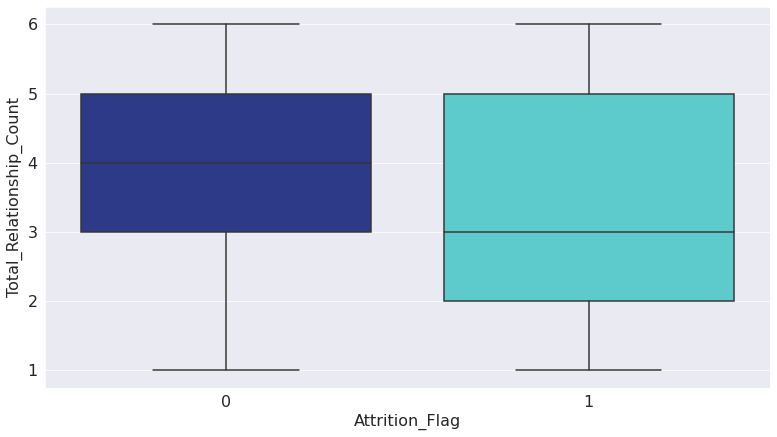

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df, palette = ['#1e2f97', '#4ADEDE'])

Total number of products held by the customer has an average of about 4 for existing customers. On the other hand, attrited customers have an average of about 3 different product. It can be concluded that accounts with lower number of products are more likely to leave the service than the customers with higher number of products.

#### Total Revolving Balance 

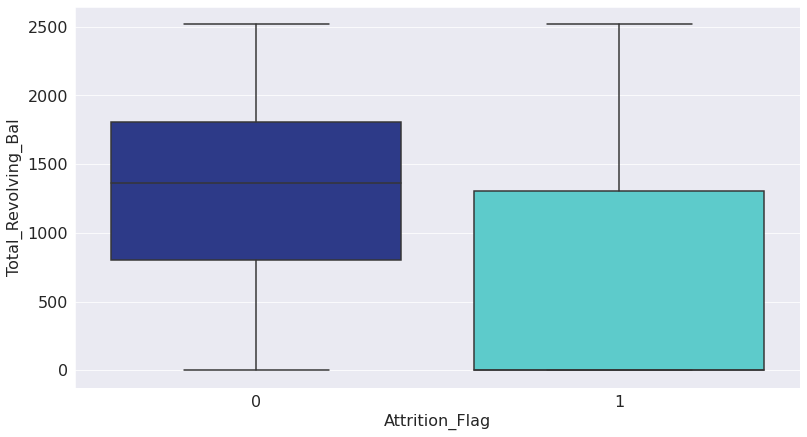

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df, palette = ['#1e2f97', '#4ADEDE'])

Customers with with 0 or low revolving balance have high probablity of getting churned. Inversely, customers with greater revolving balance are more likely to stay loyal to the bank. 

#### Total Transaction Amount 

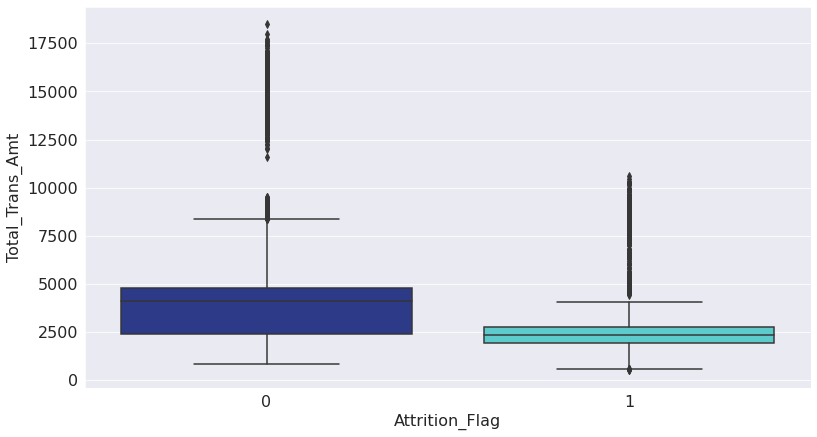

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df, palette = ['#1e2f97', '#4ADEDE'])

From the above plot, there is a clear differentiation between attrited and existing customers in aspect of transaction amount, customers with high transaction amount are more likely to remain loyal to the bank and continue the services as compared to the ones having low transaction amount. ( Trasaction amount < 2500 - Customer at high risk of churning, Transaction amount > 2500 - More probablity of customer remaining loyal to the bank)

#### Total Transaction Count

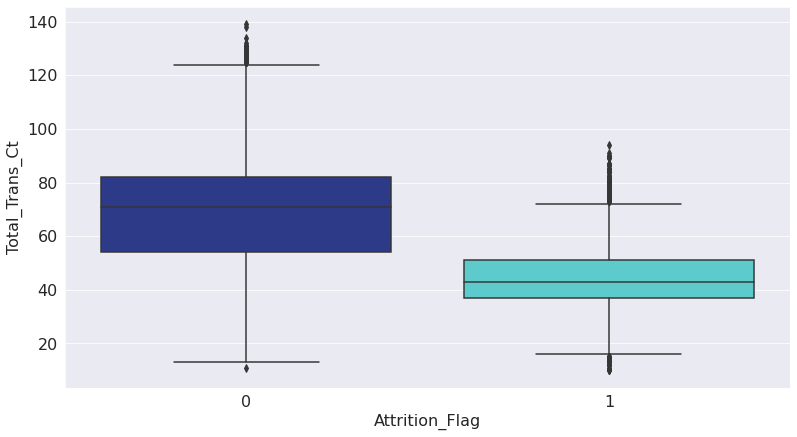

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df, palette = ['#1e2f97', '#4ADEDE'])

From the above box-plot it is evident that customer with low transaction count are at high risk of churning. On seeing the numbers, customers with transaction count less than 50 are likely to discountinue the services. 

#### Avg_Utilization Ratio 

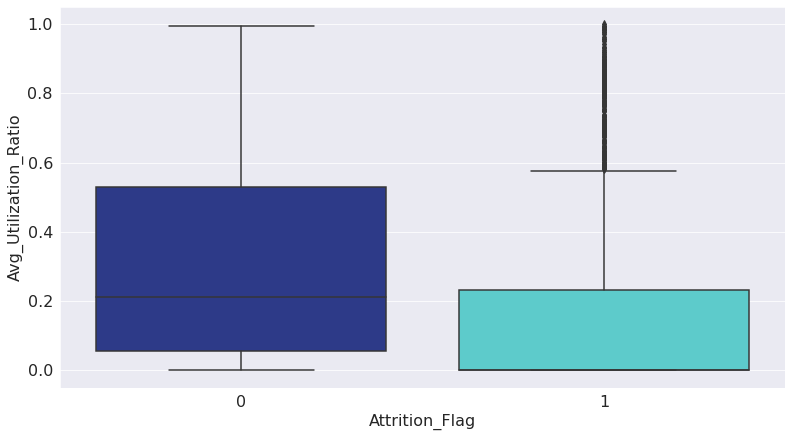

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df, palette = ['#1e2f97', '#4ADEDE'])

The average credit utilization ratio for most of the customers is very low i.e., below 10%. This indicates that most customers are not utilizing the credit limit provided to them

#### Total Count change from Q4 to Q1 

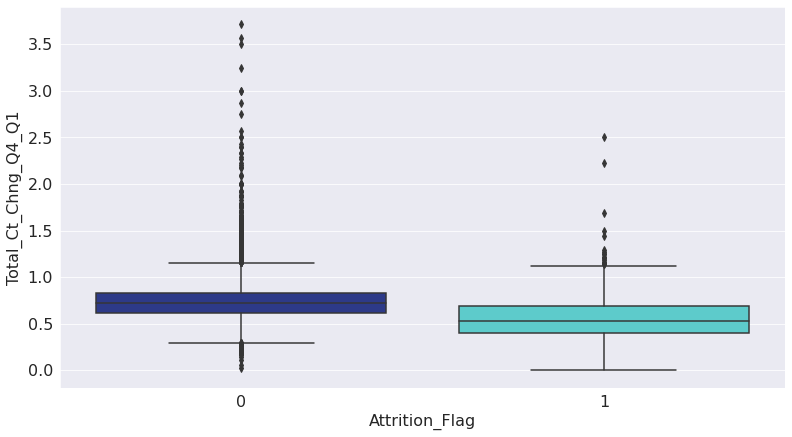

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df, palette = ['#1e2f97', '#4ADEDE'])

The amounts are very similar when comparing the amounts that change between the quarters. It can be concluded that there's not much seasonality here.

#### Months Inactive in the last 12 month 

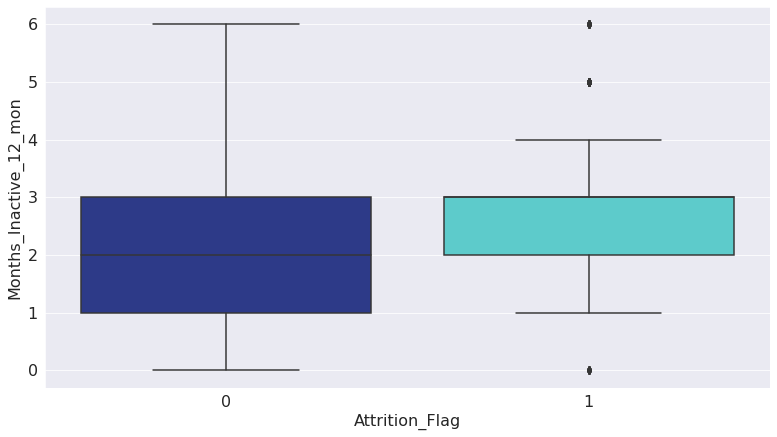

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=df, palette = ['#1e2f97', '#4ADEDE'])

Number of months inactive in the last 12 months isn't that clearly displayed in this box plot but higher inactivity may lean towards the attrited customers.

#### Contacts Count in the last 12 month

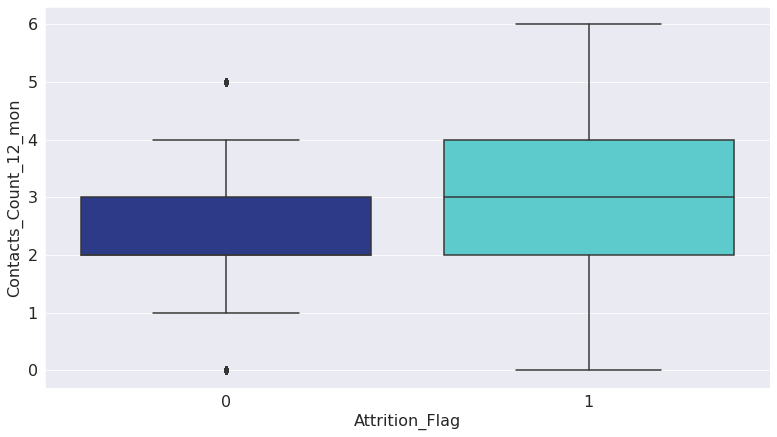

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df, palette = ['#1e2f97', '#4ADEDE'])

From the above plot, it is evident that customers who attrited had high number of contacts with the bank in the past 12 months.

#### Dependent Count

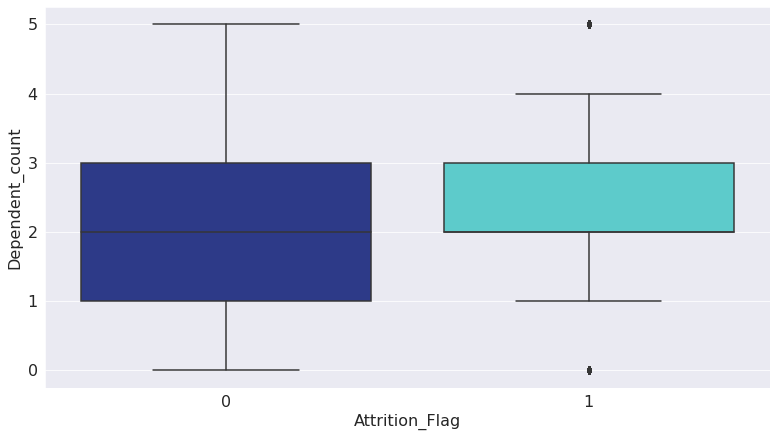

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=df, palette = ['#1e2f97', '#4ADEDE'])

The distinction between the demographic of number of dependents is not that clear. The higher number may lean more towards the attrited customers but it's not clearly displayed.

#### Credit Limit

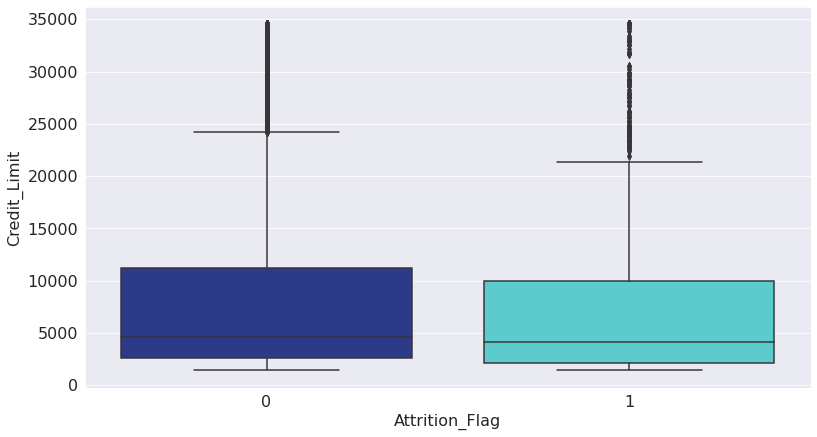

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
ax = sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df, palette = ['#1e2f97', '#4ADEDE'])

On an average, the attrited customers have slightly lower credit limit than existing customers.

## Modify
---

In this third process of SEMMA, modification of few columns and also analyse various columns to see if they have any significant effect on  Target Variable. Validation of few columns was done to check while deciding on transforming to Principal Components. Columns having high variability or those that are directly proportional to the churn are dropped.



Based on the above analysis, columns Months_on_book, Customer_Age, Avg_Open_To_Buy are excluded.

Credit limit is directly derived from the Total revolving balance and hence it can be dropped as well.

Excluded Education Level because this column has many distinct values which will cause Biased relationship with Attrition flag.

Multi-collinearity for all the columns is checked based on correlation matrix. Month_on_Book and Customer_Age were the ones which showed multi-collinearity but they had already been dropped earlier.

In [ ]:
df_model= df.drop(['Months_on_book','Customer_Age','Credit_Limit','Avg_Open_To_Buy','Education_Level','Avg_Utilization_Ratio'],axis=1)
df_model.head()

Attrition_Flag Gender  ...  Total_Trans_Ct Total_Ct_Chng_Q4_Q1
0               0      M  ...              42               1.625
1               0      F  ...              33               3.714
2               0      M  ...              20               2.333
3               0      F  ...              20               2.333
4               0      M  ...              28               2.500

[5 rows x 14 columns]

Below is the Code to convert all the Categorical variables into Binary variables format to have a better analysis of the complete variables data.

In [ ]:
num_cols = list(df_model.select_dtypes(["int64","float64"]))
cat_cols = list(df_model.select_dtypes("object"))

In [ ]:
for col in cat_cols:
    dummy_cols = pd.get_dummies(df_model[col], drop_first=True, prefix=col)
    df_model = pd.concat([df_model,dummy_cols],axis=1)
    df_model.drop(columns=col, inplace=True)

Final Sampled Data

In [ ]:
df_model.head()

Attrition_Flag  ...  Card_Category_Silver
0               0  ...                     0
1               0  ...                     0
2               0  ...                     0
3               0  ...                     0
4               0  ...                     0

[5 rows x 22 columns]

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Total_Relationship_Count        10127 non-null  int64  
 3   Months_Inactive_12_mon          10127 non-null  int64  
 4   Contacts_Count_12_mon           10127 non-null  int64  
 5   Total_Revolving_Bal             10127 non-null  int64  
 6   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 7   Total_Trans_Amt                 10127 non-null  int64  
 8   Total_Trans_Ct                  10127 non-null  int64  
 9   Total_Ct_Chng_Q4_Q1             10127 non-null  float64
 10  Gender_M                        10127 non-null  uint8  
 11  Marital_Status_Married          10127 non-null  uint8  
 12  Marital_Status_Single           

### Target Variable Imbalance
 

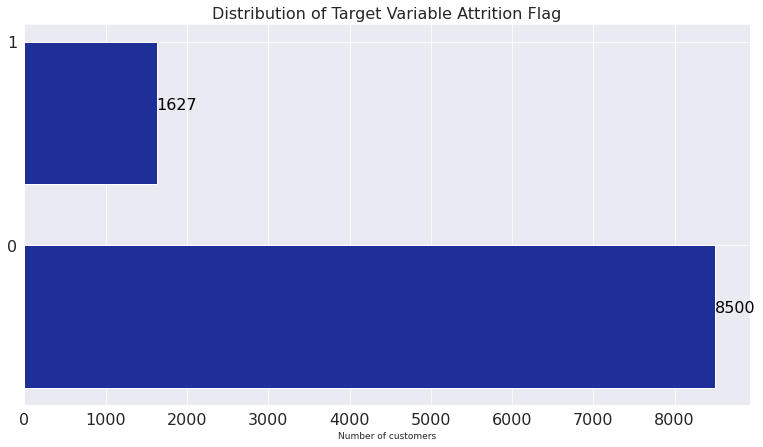

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for distriution of Target variable 
a = df.Attrition_Flag.value_counts()

x = list(a.index)
y = list(a)
fig, ax = plt.subplots(figsize=(13, 7))
 
width = 0.7 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#1e2f97")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .15, i + .02, str(v), color='Black') #add value labels into bar
plt.xlabel('Number of customers', fontsize = 9)
plt.title('Distribution of Target Variable Attrition Flag', fontsize = 16)
plt.show()

In [ ]:
df_model['Attrition_Flag'].value_counts() #  to quickly show the distribution in numbers

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

### Handling the Imbalance in Target Variable

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. The imbalance in the distribution of target categories can lead to a pretty high accuracy just by predicting the majority class, but  fail to capture the minority class, which is actually the class of interest and the point of creating the model in the first place. Thus, there is a need to balance the data before modeling.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

In under-sampling, removing random records from the majority class can cause loss of information in this particular dataset.

Thus, the preferred technique is Oversampling. **SMOTE** (Synthetic Minority Oversampling Technique) randomly picks a point from the minority class and computes the k-nearest neighbors for this point. These points are added between the chosen point and its neighbors thereby creating synthetic data for the minority class.

Note: Oversampling was done after splitting the data to Train and Test. 
Then, oversampling was applied only on training data but not on Test Data. 

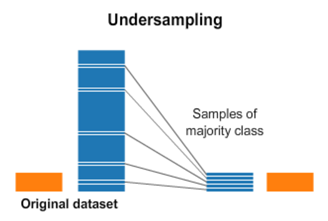

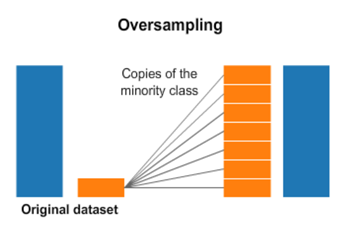




In [ ]:
# oversampling 
# import random oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X = df_model.drop(['Attrition_Flag'],axis=1)
y = df_model['Attrition_Flag']

In [ ]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

Text(0, 0.5, 'Frequency')

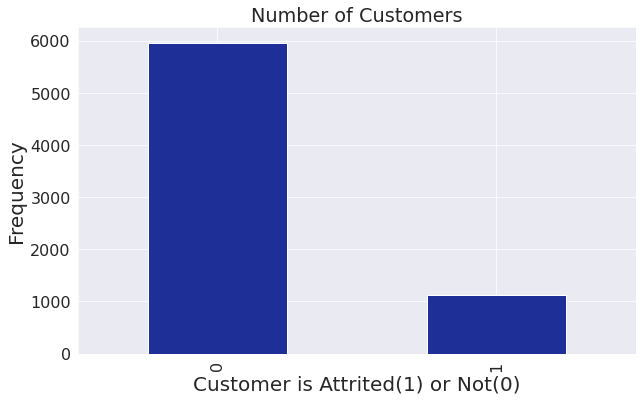

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(13, 7))

plt.rcParams['font.size'] = '16'
ax = y_train.value_counts().plot(kind='bar',figsize=(10,6),title="Number of Customers", color="#1e2f97")

#matplotlib.rc('font', **font)
ax.set_xlabel("Customer is Attrited(1) or Not(0)",fontsize =20)
ax.set_ylabel("Frequency" , fontsize = 20)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
### Scale the data before applying SMOTE
sm = SMOTE(random_state=42, n_jobs=8, sampling_strategy=0.50)
### Resample X_train_scaled
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_SMOTE))
y_pd = pd.DataFrame(y_train_SMOTE)
y_pd

original dataset shape: Counter({0: 5957, 1: 1131})
Resample dataset shape Counter({0: 5957, 1: 2978})


0
0     0
1     0
2     0
3     0
4     1
...  ..
8930  1
8931  1
8932  1
8933  1
8934  1

[8935 rows x 1 columns]

Text(0, 0.5, 'Frequency')

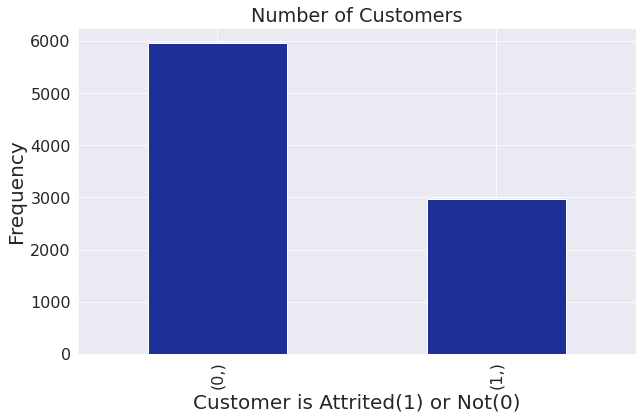

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(13, 7))

plt.rcParams['font.size'] = '16'
ax = y_pd.value_counts().plot(kind='bar',figsize=(10,6),title="Number of Customers",color="#1e2f97")

#matplotlib.rc('font', **font)
ax.set_xlabel("Customer is Attrited(1) or Not(0)",fontsize =20)
ax.set_ylabel("Frequency" , fontsize = 20)

## Modeling
---

With the variables modified and data cleaned, the modeling step applies a variety of machine learning algorithms in order to produce a prediction model for classifying the Churn.

The variables selected are having good correlation with the target variables. Below are the few models that will be worked on for Prediction of the Target Variable:

1. Logistic Regression
2. Decision Tree
3. KNN
4. AdaBoostClassifier
5. Random Forest Classifier
6. Gradient Boosting Classifier
7. Extra Trees Classifier
8. Perceptron



### Logistic Regression
---

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. Logistic regression aims to measure the relationship between a categorical dependent variable and one or more independent variables (usually continuous) by plotting the dependent variables' probability scores.


In [ ]:
# Logistic Regression with oversampled data
model_logistic = LogisticRegression(max_iter=10000, random_state=42)
model_logistic.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_logistic = model_logistic.predict(X_test)

In [ ]:
accuracy_logistic = accuracy_score(y_pred_logistic,y_test)*100
print('\nAccuracy:',accuracy_logistic)

precision_logistic = metrics.precision_score(y_test, y_pred_logistic)
print("\nPrecision:",precision_logistic)

recall_logistic = metrics.recall_score(y_test, y_pred_logistic)
print("\nRecall:",recall_logistic)

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print('\nConfusionMatrix:\n', confusion_matrix(y_test, y_pred_logistic))


print('\nClassification_report:\n',classification_report(y_test,y_pred_logistic))



Accuracy: 88.45014807502469

Precision: 0.6239316239316239

Recall: 0.7358870967741935

ConfusionMatrix:
 [[2323  220]
 [ 131  365]]

Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2543
           1       0.62      0.74      0.68       496

    accuracy                           0.88      3039
   macro avg       0.79      0.82      0.80      3039
weighted avg       0.89      0.88      0.89      3039



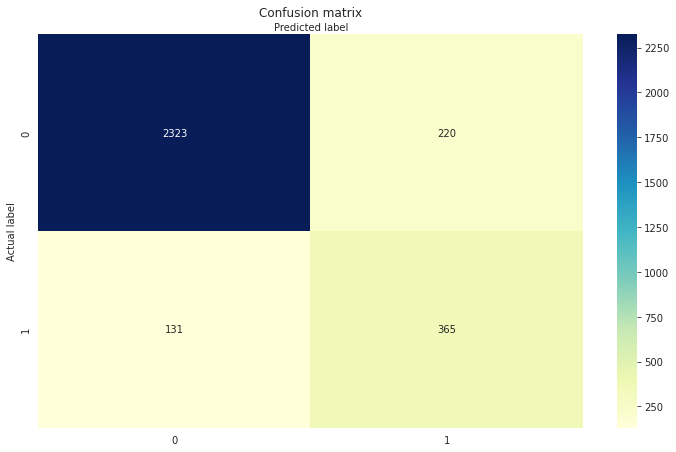

In [ ]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_logistic), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Decision Tree
---
A Decision Tree is an algorithm used for supervised learning problems such as classification or regression. Each leaf of the tree is labeled with a class or a probability distribution over the classes. A tree can be "learned" by splitting the source set into subsets based on an attribute value test.

In [ ]:
# Decision Tree with Oversampled Data
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
model_DecTree = DecisionTreeClassifier(random_state=42,max_depth=10)

# Train Decision Tree Classifer
model_DecTree = model_DecTree.fit(X_train_SMOTE,y_train_SMOTE)

#Predict the response for test dataset
y_pred_DecTree = model_DecTree.predict(X_test)

In [ ]:
accuracy_DecTree = accuracy_score(y_pred_DecTree,y_test)*100
print('\nAccuracy:',accuracy_DecTree)

precision_DecTree = metrics.precision_score(y_test, y_pred_DecTree)
print("\nPrecision:",precision_DecTree)

recall_DecTree = metrics.recall_score(y_test, y_pred_DecTree)
print("\nRecall:",recall_DecTree)

cm_DecTree = confusion_matrix(y_test, y_pred_DecTree)
print('\nConfusionMatrix:\n', cm_DecTree)

print('\nClassification_report:\n',classification_report(y_test,y_pred_DecTree))


Accuracy: 93.12273774267851

Precision: 0.7775628626692457

Recall: 0.8104838709677419

ConfusionMatrix:
 [[2428  115]
 [  94  402]]

Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2543
           1       0.78      0.81      0.79       496

    accuracy                           0.93      3039
   macro avg       0.87      0.88      0.88      3039
weighted avg       0.93      0.93      0.93      3039



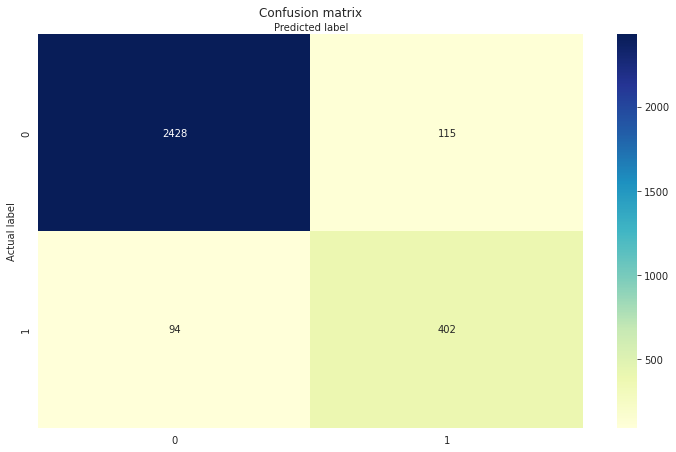

In [ ]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_DecTree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
v=list(X_train.columns)
v

['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Gender_M',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

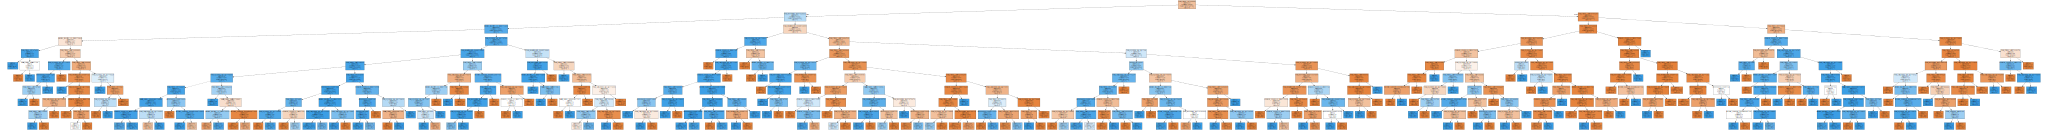

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model_DecTree, out_file=None, 
                                feature_names=v,  
                                class_names=['0','1'],filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
graph.render("decision_tree_TEAM1_graphivz_DS")

'decision_tree_TEAM1_graphivz_DS.png'

In [ ]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model_DecTree, X, y,target_name="target",feature_names=v,class_names=['0','1'])
viz

     |████████████████████████████████| 61 kB 489 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67694 sha256=e741f05cfac49e9dc9d363139c0ffce257e40a5c3d057bffb53b99fc017b5b47
  Stored in directory: /root/.cache/pip/wheels/f4/e0/4c/26144f03fd05b7c3d82e5cf2679c2d6bd9d9b730548264674d
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [ ]:
viz.save("decision_tree_TEAM1_DS.svg")

### KNN
---
KNN stands for k-Nearest Neighbours. It is a supervised learning algorithm.  k-nearest neighbors algorithm called “lazy” because it does no training at all when you supply the training data. At training time, all it is doing is storing the complete data set but it does not do any calculations at this point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_KNN = KNN_model.predict(X_test)

accuracy_KNN = accuracy_score(y_pred_KNN,y_test)*100
print('\nAccuracy:',accuracy_KNN)

precision_KNN = metrics.precision_score(y_test, y_pred_KNN)
print("\nPrecision:",precision_KNN)

recall_KNN = metrics.recall_score(y_test, y_pred_KNN)
print("\nRecall:",recall_KNN)

cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print('\nConfusionMatrix:\n', cm_KNN)

print('\nClassification_report:\n',classification_report(y_test,y_pred_KNN))


Accuracy: 87.13392563343206

Precision: 0.5850891410048622

Recall: 0.7278225806451613

ConfusionMatrix:
 [[2287  256]
 [ 135  361]]

Classification_report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      2543
           1       0.59      0.73      0.65       496

    accuracy                           0.87      3039
   macro avg       0.76      0.81      0.78      3039
weighted avg       0.89      0.87      0.88      3039



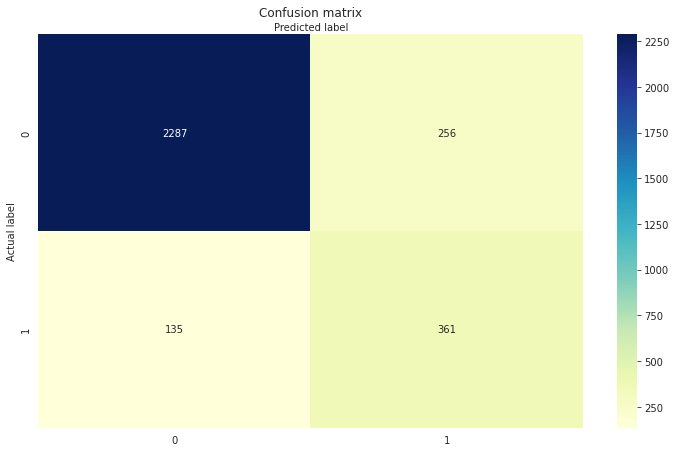

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_KNN), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### AdaBoostClassifier
---
AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_ada=model_ada.predict(X_test)

accuracy_ada = accuracy_score(y_pred_ada,y_test)*100
print('\nAccuracy:',accuracy_ada)

precision_ada = metrics.precision_score(y_test, y_pred_ada)
print("\nPrecision:",precision_ada)

recall_ada = metrics.recall_score(y_test, y_pred_ada)
print("\nRecall:",recall_ada)

cm_ada = confusion_matrix(y_test, y_pred_ada)
print('\nConfusionMatrix:\n', cm_ada)

print('\nClassification_report:\n',classification_report(y_test,y_pred_ada))


Accuracy: 95.55774925962488

Precision: 0.8646464646464647

Recall: 0.8629032258064516

ConfusionMatrix:
 [[2476   67]
 [  68  428]]

Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2543
           1       0.86      0.86      0.86       496

    accuracy                           0.96      3039
   macro avg       0.92      0.92      0.92      3039
weighted avg       0.96      0.96      0.96      3039



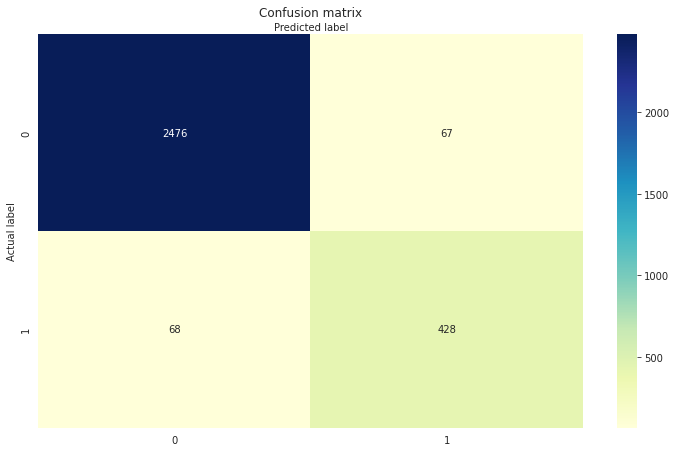

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_ada), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Random Forest Classifier
---
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. Random forest models are not all that interpretable; they are like black boxes. For very large data sets, the size of the trees can take up a lot of memory. It can tend to overfit, so you should tune the hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth=100, random_state=42)
model_rfc.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_rfc=model_rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_pred_rfc,y_test)*100
print('\nAccuracy:',accuracy_rfc)

precision_rfc = metrics.precision_score(y_test, y_pred_rfc)
print("\nPrecision:",precision_rfc)

recall_rfc = metrics.recall_score(y_test, y_pred_rfc)
print("\nRecall:",recall_rfc)

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('\nConfusionMatrix:\n', cm_rfc)

print('\nClassification_report:\n',classification_report(y_test,y_pred_rfc))


Accuracy: 95.52484369858506

Precision: 0.9072398190045249

Recall: 0.8084677419354839

ConfusionMatrix:
 [[2502   41]
 [  95  401]]

Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2543
           1       0.91      0.81      0.86       496

    accuracy                           0.96      3039
   macro avg       0.94      0.90      0.91      3039
weighted avg       0.95      0.96      0.95      3039



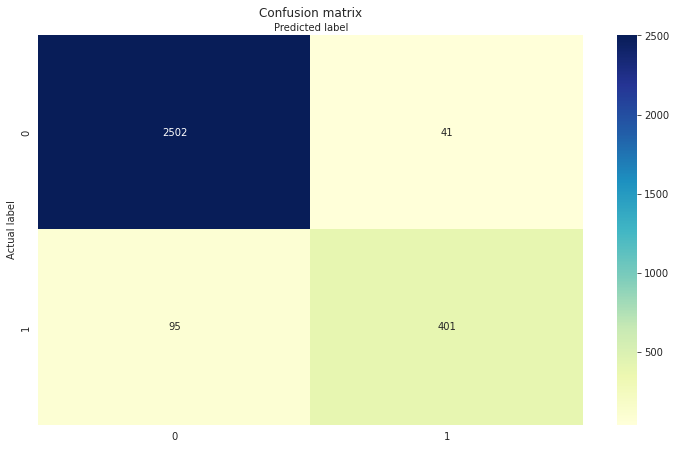

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Gradient Boosting Classifier
---
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42).fit(X_train, y_train)
y_pred_gbc=model_gbc.predict(X_test)

accuracy_gbc = accuracy_score(y_pred_gbc,y_test)*100
print('\nAccuracy:',accuracy_gbc)

precision_gbc = metrics.precision_score(y_test, y_pred_gbc)
print("\nPrecision:",precision_gbc)

recall_gbc = metrics.recall_score(y_test, y_pred_gbc)
print("\nRecall:",recall_gbc)

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
print('\nConfusionMatrix:\n', cm_gbc)

print('\nClassification_report:\n',classification_report(y_test,y_pred_gbc))



Accuracy: 95.72227706482396

Precision: 0.8978260869565218

Recall: 0.8326612903225806

ConfusionMatrix:
 [[2496   47]
 [  83  413]]

Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2543
           1       0.90      0.83      0.86       496

    accuracy                           0.96      3039
   macro avg       0.93      0.91      0.92      3039
weighted avg       0.96      0.96      0.96      3039



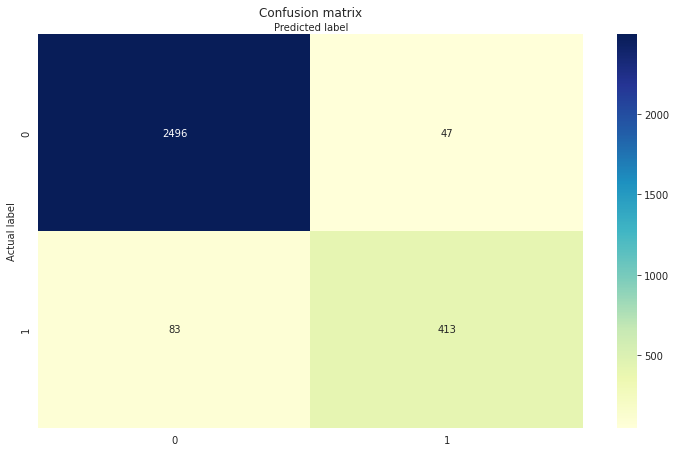

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_gbc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Extra Trees Classifier
---
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_etc.fit(X_train, y_train)
y_pred_etc = model_etc.predict(X_test)


accuracy_etc = accuracy_score(y_pred_etc,y_test)*100
print('\nAccuracy:',accuracy_etc)

precision_etc = metrics.precision_score(y_test, y_pred_etc)
print("\nPrecision:",precision_etc)

recall_etc = metrics.recall_score(y_test, y_pred_etc)
print("\nRecall:",recall_etc)

cm_etc = confusion_matrix(y_test, y_pred_etc)
print('\nConfusionMatrix:\n', cm_etc)

print('\nClassification_report:\n',classification_report(y_test,y_pred_etc))


Accuracy: 92.72787101020073

Precision: 0.9256965944272446

Recall: 0.6028225806451613

ConfusionMatrix:
 [[2519   24]
 [ 197  299]]

Classification_report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2543
           1       0.93      0.60      0.73       496

    accuracy                           0.93      3039
   macro avg       0.93      0.80      0.84      3039
weighted avg       0.93      0.93      0.92      3039



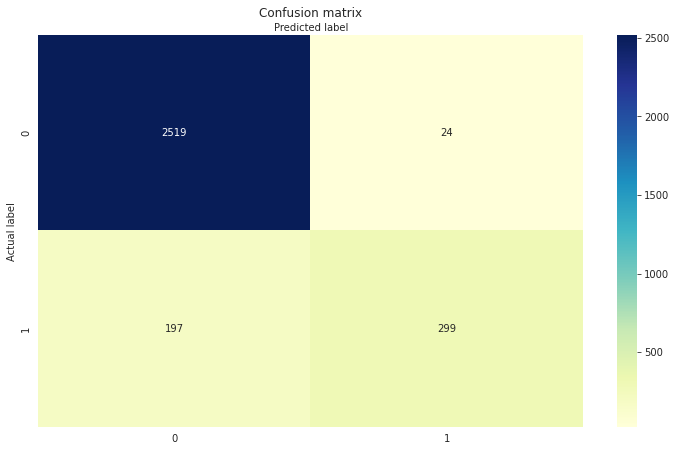

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_etc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Perceptron
---
A perceptron model, in Machine Learning, is a supervised learning algorithm of binary classifiers. A linear ML algorithm, the perceptron conducts binary classification or two-class categorization and enables neurons to learn and register information procured from the inputs.

In [ ]:
# Import
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

In [ ]:
# Perceptron
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train)

y_pred_per = ppn.predict(X_test_std)

accuracy_per = accuracy_score(y_pred_per,y_test)*100
print('\nAccuracy:',accuracy_per)

precision_per = metrics.precision_score(y_test, y_pred_per)
print("\nPrecision:",precision_per)

recall_per = metrics.recall_score(y_test, y_pred_per)
print("\nRecall:",recall_per)

cm_per = confusion_matrix(y_test, y_pred_per)
print('\nConfusionMatrix:\n', cm_per)

print('\nClassification_report:\n',classification_report(y_test,y_pred_per))


Accuracy: 86.14675880223757

Precision: 0.5733855185909981

Recall: 0.5907258064516129

ConfusionMatrix:
 [[2325  218]
 [ 203  293]]

Classification_report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2543
           1       0.57      0.59      0.58       496

    accuracy                           0.86      3039
   macro avg       0.75      0.75      0.75      3039
weighted avg       0.86      0.86      0.86      3039



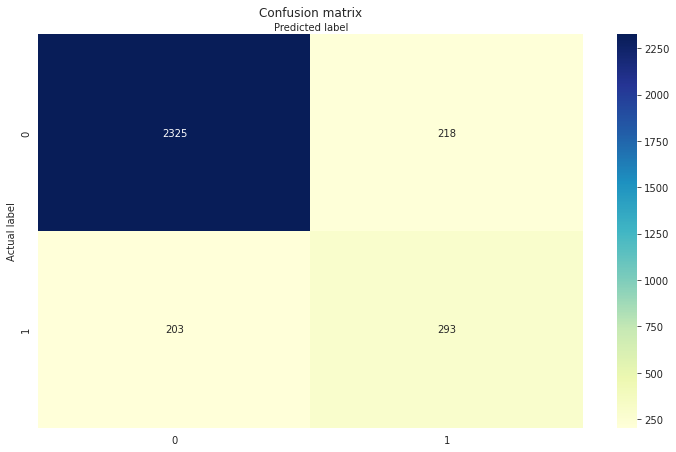

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(13,7))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_per), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Assessment
---
This is the final process in SEMMA where various parameter are assessed to decide on the Best Model that gives good Prediction.

The 3 key factors that will be used to finalize the Best model are:

* Accuracy
* Recall
* Interpretability




In [ ]:
accuracy = [accuracy_logistic,accuracy_DecTree,accuracy_KNN,accuracy_ada,accuracy_rfc,accuracy_gbc,accuracy_etc,accuracy_per]
recall = [recall_logistic,recall_DecTree,recall_KNN,recall_ada,recall_rfc,recall_gbc,recall_etc,recall_per]
precision = [precision_logistic,precision_DecTree,precision_KNN,precision_ada,precision_rfc,precision_gbc,precision_etc,precision_per]

accuracy =  [round(elem, 2) for elem in accuracy]
recall =  [round(elem, 2) for elem in recall]
precision =  [round(elem, 2) for elem in precision]

col = {'Accuracy in %': accuracy, 'Recall': recall, 'Precision':precision}
models=['Logistic Regression','Decision Tree','KNN','AdaBoost Classifier','Random Forest Classifier','Gradient Boosting Classifier','Extra Trees Classifier','Perceptron']
assess = pd.DataFrame(data = col, index = models)
assess

print(accuracy)
print(precision)
print(recall)
assess


[88.45, 93.12, 87.13, 95.56, 95.52, 95.72, 92.73, 86.15]
[0.62, 0.78, 0.59, 0.86, 0.91, 0.9, 0.93, 0.57]
[0.74, 0.81, 0.73, 0.86, 0.81, 0.83, 0.6, 0.59]


Accuracy in %  Recall  Precision
Logistic Regression                   88.45    0.74       0.62
Decision Tree                         93.12    0.81       0.78
KNN                                   87.13    0.73       0.59
AdaBoost Classifier                   95.56    0.86       0.86
Random Forest Classifier              95.52    0.81       0.91
Gradient Boosting Classifier          95.72    0.83       0.90
Extra Trees Classifier                92.73    0.60       0.93
Perceptron                            86.15    0.59       0.57

### Accuracy 
---
Below is the bar chart for Accuracy values of all the models

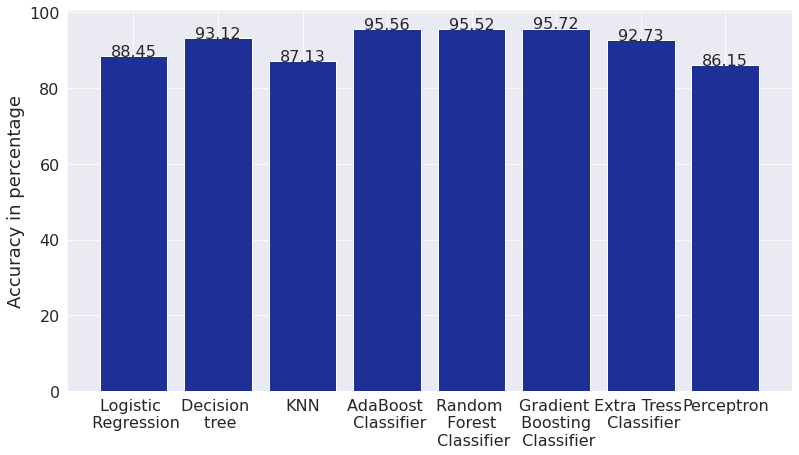

In [ ]:
# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(models,accuracy):
    for i in range(len(models)):
        plt.text(i, accuracy[i], accuracy[i], ha = 'center')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    models = ['Logistic \n Regression', 'Decision \n tree', 'KNN', 'AdaBoost \n Classifier', 'Random \n Forest \n Classifier', 'Gradient \n Boosting \n Classifier', 'Extra Tress \n Classifier', 'Perceptron']
    accuracy = accuracy
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (13, 7))
      
    # making the bar chart on the data
    plt.bar(models, accuracy, color = '#1e2f97')
      
    # calling the function to add value labels
    addlabels(models, accuracy)
      
    # giving title to the plot
    #plt.title("Accuracy of all models", fontsize=20)
      
    # giving X and Y labels
    #plt.xlabel("Models", fontsize=18)
    plt.ylabel("Accuracy in percentage", fontsize=18)
      
    # visualizing the plot
    plt.show()

### Recall
---
Below is the bar chart for Recall values of all the models

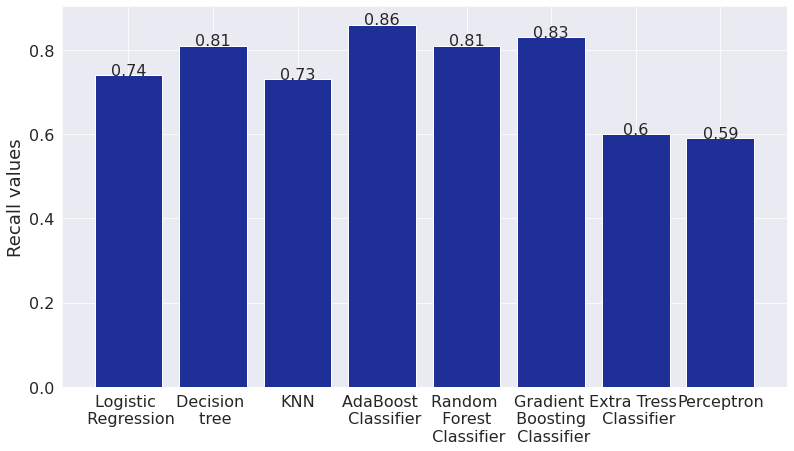

In [ ]:
# function to add value labels
def addlabels(models,recall):
    for i in range(len(models)):
        plt.text(i, recall[i], recall[i], ha = 'center')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    models = ['Logistic \n Regression', 'Decision \n tree', 'KNN', 'AdaBoost \n Classifier', 'Random \n Forest \n Classifier', 'Gradient \n Boosting \n Classifier', 'Extra Tress \n Classifier', 'Perceptron']
    recall = recall
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (13, 7))
      
    # making the bar chart on the data
    plt.bar(models, recall, color = '#1e2f97')
      
    # calling the function to add value labels
    addlabels(models, recall)
      
    # giving title to the plot
    #plt.title("Recall of all models", fontsize=20)
      
    # giving X and Y labels
    #plt.xlabel("Models", fontsize=18)
    plt.ylabel("Recall values", fontsize=18)

From the above assessment paramters it can be observed that Decision Tree,AdaBoost Classifer, Gradient Boosting Classifier had a higher accuracy and recall compared to all other models. 

The key focus of analysis is on Recall and on the false negatives values which represents that a customer is churned but model predicted as currently present. 

Also, in problem statements like this, its important to know the key factors that affect the churn of a customer.

So, based on the **Recall** and **Interpretability**, the best model was selected as Decision Tree Model. 

## Conclusion
---
So, as per the Assessment, it can be concluded that Decision tree is the Best Model which good predictability in Terms of Recall and Interpretability of Model. 

Below are the assessment values of Decision Tree Model

1) Accuracy = 93.12

2) Recall = 	0.81

3) Precision = 	0.78

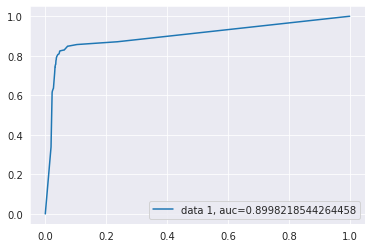

In [ ]:
# Below is the ROC curve of the Decision Tree Model
y_pred_proba = model_DecTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Based on the Decision Tree splits, the key Preditors effecting the Churn of Customers

1.   Total Transactions Count
2.   Total Revolving Balance
3.   Total Relationship count
4.   Total Count change Q4 to Q1
5.   Income category of Unknown
6.   Dependent count (lesser than 4)
7.   Card Category of Silver




## Recommendations
---

The highest performing predictive model's (Decision Tree) key predictor, and  the variable with the strongest negative correlation that was identified during exploration was the Total Transaction Count at -0.37. It is good to implement incentives to raise customers transaction volume, since indicators show the more transactions, the less likely the company will lose them to attrition.

For example, for customers with a lower transaction count, offer additional benefits such as multiplied reward points once their transaction count passes a certain threshold, say 60. This potentially can lead to the customer utilizing their card more often and generate additional revenue and business. This also ensures that there is a minimum usage of the card before benefits are realized, increasing customer interactions to a minimum threshold. A realistic threshold can be determined between the Q1 and Q3 of the Transaction Count to Attrition Box Plot.
 
This is loosely supported by the positive correlation, 0.15, between Attrition and the number of months the client has been inactive. Logic follows that the less active a customer is, the fewer transactions they will complete. This is eveident from relationship to a lesser degree with a slight negative correlation between Total Transaction Count and Inactive Months.

Utilizing the Predictive Model, check fr those customers at high risk of leaving and send electronic reminders about rewards or other offerings. This in theory will remind customers to be active within the company’s ecosystem. This method can also be utilized to push multiple cards, which was a positively correlated predictor, the byproduct being increased interactivity within the company’s ecosystem.

Another predictor that was identified was the number of dependents (Less than 4). Rewards can be targeted towards those single or new family households for potential new customers since that demographic exhibits a lower churn. Meanwhile, for existing customers in an attempt to minimize existing churn, the company can offer additional incentives relating to established families and larger households to offset the high risk those customers have of attrition.

The type of card that the customer has also was a predictor, predominantly if they had Silver or not. Using this insight to compare the card’s attributes with the other card types, and determining which are appealing and transfer some of those attributes to the other offers.

Additionally, Revolving Balance benefits also play a role. It is recommendable that the company promotes these benefits. These are beneficial to both the customer and the company. The company can collect fees and additional interest from rolled over balances, and the customer has additional flexibility, which will not negatively impact their credit score.

However, just giving incentives will also cost the Bank a lot of money. It is important to weigh the additional cost on the bank inorder to give incentives versus the amount the bank loses while loosing the customer.


